In [1]:
import tensorflow as tf
tf.compat.v1.keras.datasets.mnist.load_data
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz')

We know that each MNIST image is a 28 x 28 bitmap. Here is one line. At the edge, of course it is all 0.

The Tensorflow docs provide:

> Returns
> Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

> `x_train, x_test`: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).

> `y_train, y_test`: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,). 

In [2]:
len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(60000, 60000, 10000, 10000)

So, 60,000 training, 10,000 testing.

We know that they are 28x28 matrices. Let's take a look at one.

In [3]:
mnist[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Oh, that is very hard to understand. Let's see one plotted.

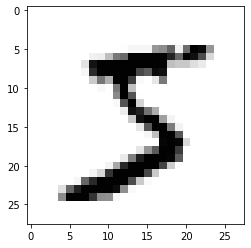

In [4]:
import matplotlib.pyplot as plt

plt.imshow(mnist[0][0][0], cmap="Greys", interpolation="nearest")
plt.show()

Apparently that is supposed to be a 5. Humans have such bad handwriting.

In [5]:
# A little cleanup before we go on
(x_train, y_train), (x_test, y_test) = mnist
x_train.shape

(60000, 28, 28)

In [6]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)


# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print(x_test.shape)
print(x_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [7]:
# Do one hot encoding on the labels:

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(num_classes)

10


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5912 - accuracy: 0.8160 - val_loss: 0.2026 - val_accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2966 - accuracy: 0.9124 - val_loss: 0.1440 - val_accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2303 - accuracy: 0.9305 - val_loss: 0.1104 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1846 - accuracy: 0.9442 - val_loss: 0.0884 - val_accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1509 - accuracy: 0.9559 - val_loss: 0.0696 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1285 - accuracy: 0.9616 - val_loss: 0.0640 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1126 - accuracy: 0.9663 - val_loss: 0.0540 - val_ac

In [10]:
model.save("mnist_sample_cnn_10_epochs.h5")

8	2	6	7	3	

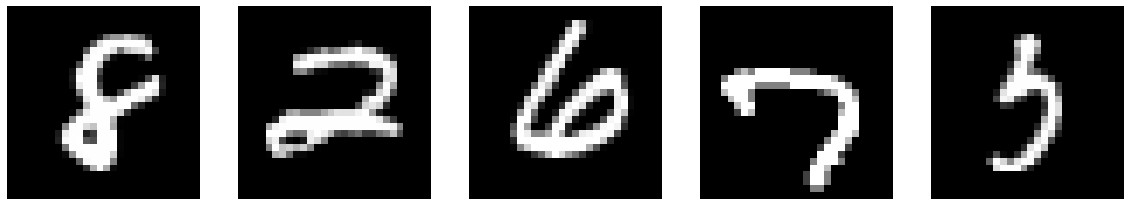

In [11]:
import numpy as np

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(
        np.argmax(
            model.predict(
                x_test[random_idx].reshape(1,28,28,1)
            ),
            axis=1),
        axis=0),end="\t")

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Redo so further transformations are overwritten.

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')


In [27]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Reshape data or Keras
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255.0

# Store input shape
input_shape = (img_rows, img_cols, 1)

# One hot encode test data
# y_test = tf.keras.utils.to_categorical(y_test)
# Actually, don't, that causes problems.

In [29]:
y_pred = model.predict_classes(x_test)

In [30]:
print(y_pred)

[7 2 1 ... 4 5 6]


In [31]:
print(y_test)

[7 2 1 ... 4 5 6]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
print(confusion_matrix(y_test, y_pred))

[[ 974    1    1    0    0    0    2    1    1    0]
 [   0 1127    2    1    0    0    2    1    2    0]
 [   2    4 1017    2    1    0    0    5    1    0]
 [   0    0    1 1004    0    2    0    1    2    0]
 [   0    0    0    0  973    0    5    0    0    4]
 [   2    0    0    6    0  879    2    1    2    0]
 [   6    3    0    1    2    2  942    0    2    0]
 [   1    5    7    2    0    0    0 1010    1    2]
 [   3    1    2    3    2    1    1    3  953    5]
 [   4    6    0    8    7    0    0    6    1  977]]


In [36]:
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

result = np.absolute(y_test-y_pred)
result_indices = np.nonzero(result > 0)

print(f"Indices of misclassified data are:\n\n {result_indices}")

Indices of misclassified data are:

 (array([ 151,  247,  259,  321,  340,  445,  449,  582,  619,  659,  684,
        717,  720,  740,  844,  924,  947, 1014, 1039, 1068, 1112, 1181,
       1182, 1226, 1232, 1247, 1260, 1299, 1319, 1393, 1414, 1500, 1522,
       1530, 1549, 1553, 1681, 1709, 1790, 1850, 1878, 1901, 1955, 2018,
       2093, 2098, 2118, 2130, 2135, 2182, 2189, 2266, 2293, 2369, 2387,
       2406, 2414, 2422, 2454, 2462, 2488, 2597, 2607, 2654, 2760, 2896,
       2927, 2939, 2953, 3030, 3060, 3073, 3289, 3422, 3503, 3520, 3558,
       3597, 3681, 3751, 3767, 3780, 3808, 3869, 3906, 3941, 3976, 4065,
       4075, 4078, 4163, 4176, 4224, 4238, 4248, 4360, 4497, 4500, 4536,
       4578, 4639, 4761, 4807, 4814, 4823, 4956, 5331, 5642, 5887, 5937,
       5955, 5973, 5982, 6071, 6081, 6091, 6166, 6505, 6555, 6571, 6597,
       6651, 7121, 8091, 8094, 8325, 8408, 8527, 9009, 9015, 9019, 9024,
       9587, 9634, 9642, 9664, 9679, 9729, 9770, 9792, 9811, 9839, 9892,
       9982])

In [37]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0


8	6	0	7	3	

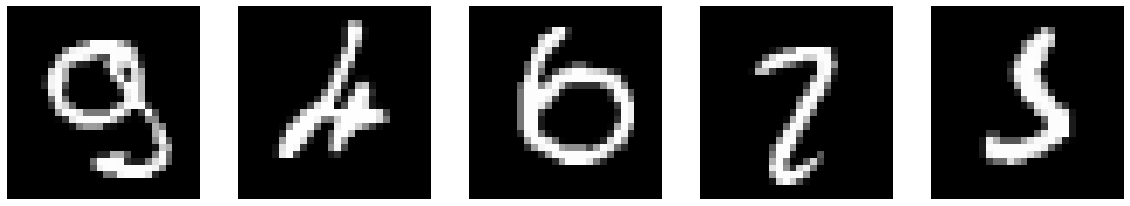

In [38]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    index = result_indices[0][i]
    plt.imshow(x_test[index,:,:,0],cmap="gray")
    plt.axis("off")
    prediction = np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
    print(prediction, end="\t")

Oh, so kind of understandable that these were misintepreted.

In [39]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 7 layers
layer_outputs = [layer.output for layer in model.layers[:7]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

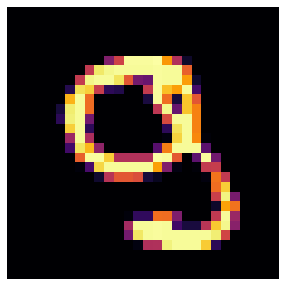

In [40]:
img_tensor = x_test[151].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="inferno")
plt.axis('off')

In [41]:
# Returns a list of seven Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

Number of layer activations: 7


In [42]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

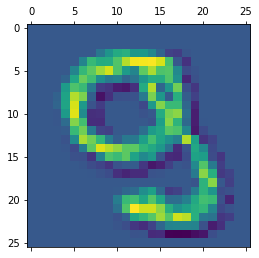

In [44]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

In [45]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

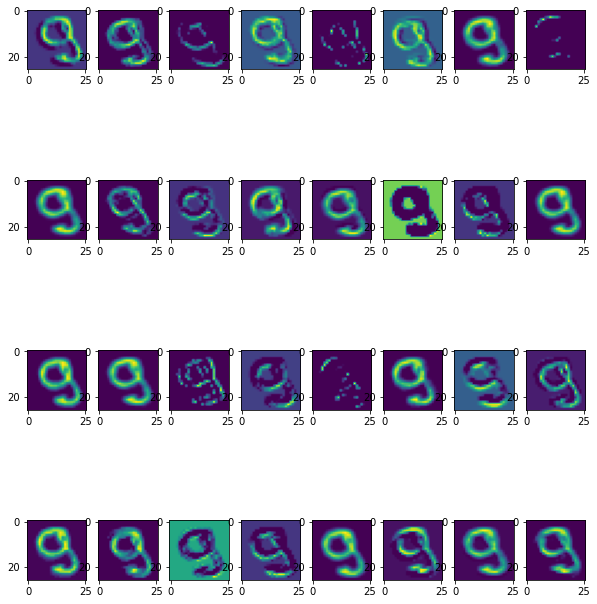

In [46]:
display_activation(activations, 8, 4, 0)

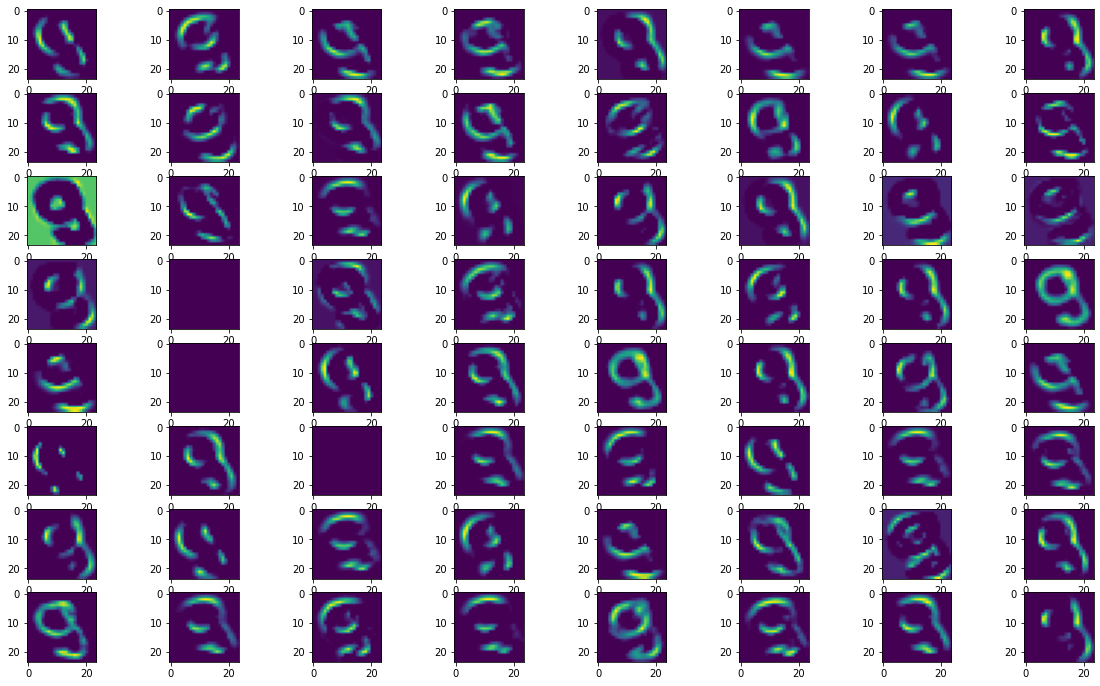

In [47]:
display_activation(activations, 8, 8, 1)

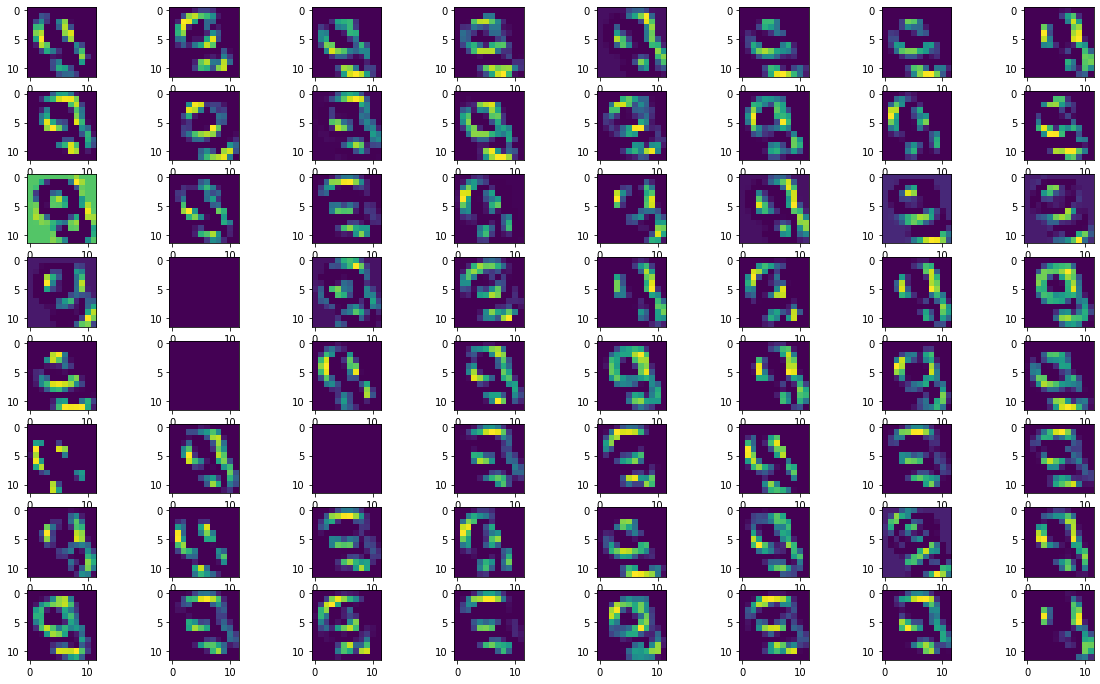

In [48]:
display_activation(activations, 8, 8, 2)